<a href="https://colab.research.google.com/github/Masyithah28/PembelajaranMesin_Ganjil_2024/blob/main/Jobsheet4Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 4 - Klasifikasi

Nama  : Masyithah Sophia Damayanti

Kelas : TI-3C

No    : 15

NIM   : 2241720011

[Github](https://github.com/Masyithah28/PembelajaranMesin_Ganjil_2024/blob/main/Jobsheet4Klasifikasi.ipynb)

[Google Colab](https://colab.research.google.com/drive/1kbkQyIjZJXnfDey2iYGCsARcD20oajMy?usp=sharing)




## Praktikum 1

### Langkah 1

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Langkah 2

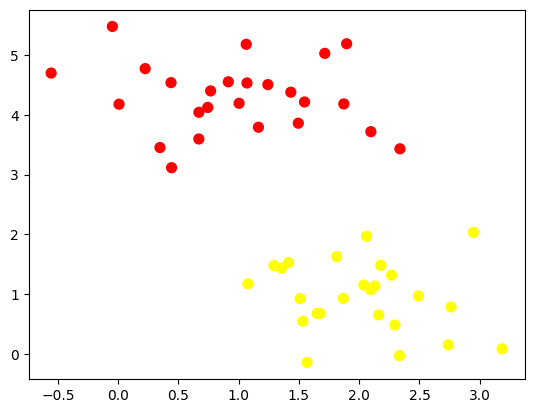

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Hasil:** membuat dataset dengan dua kelompok titik data yang menggunakan make_blobs, dan divisualisasikan menjadi titik-titik didalam grafik scatter, setiap kelompok titik diberi warnna berbeda untuk menunjukkan kluster yang berbeda

### Langkah 3

(-1.0, 3.5)

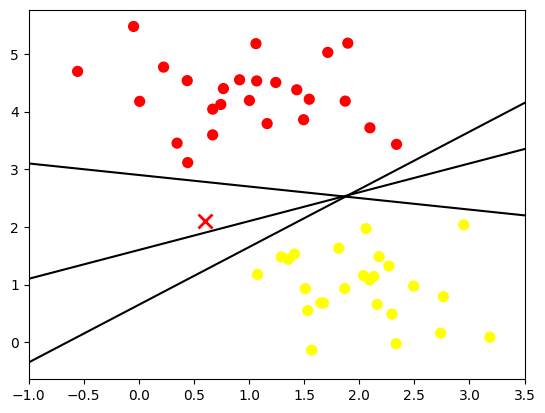

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

**Hasil:** Untuk memplot data yang sudah ada, dengan menambahkan tanda silang merah di titik(0.6, 2.1) dan menggambar tiga garis lurus dengan kemiringan dan posisi yang berbeda di atas plot untuk menunjukkan berbagai pembagian garis di antara kluster data

### Langkah 4

(-1.0, 3.5)

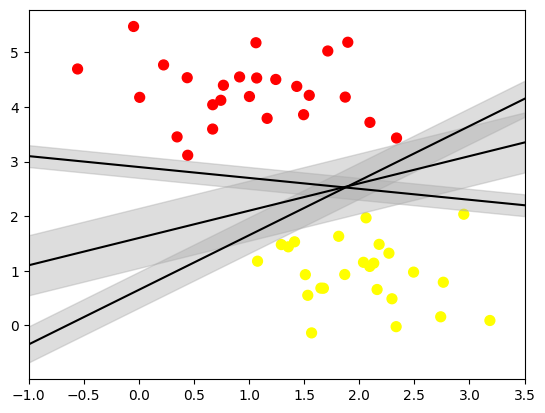

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

(-1.0, 3.5)

Fungsi plt.fill_between mengisi area di sekitar garis dengan warna abu-abu muda, dari y−d hingga 𝑦+𝑑, yang merepresentasikan area ketidakpastian atau margin.

### Langkah 5

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
SVC(C=10000000000.0, kernel='linear')

SVC(C=10000000000.0, kernel='linear')

### Langkah 6

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Langkah 7

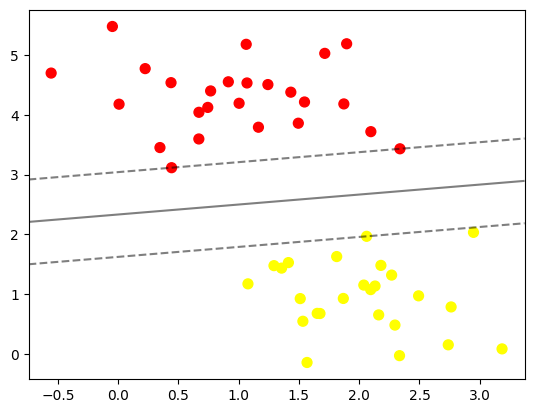

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

**Hasil:** Terdapat garis pemisah antara dua kelompok data, serta menampilkan margin di sekitar garis pemisah. Jika diaktifkan, fungsi ini juga menandai support vectors—titik data penting yang memengaruhi posisi garis pemisah dengan lingkaran kosong besar di sekitar mereka.

### Langkah 8

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

### Langkah 9

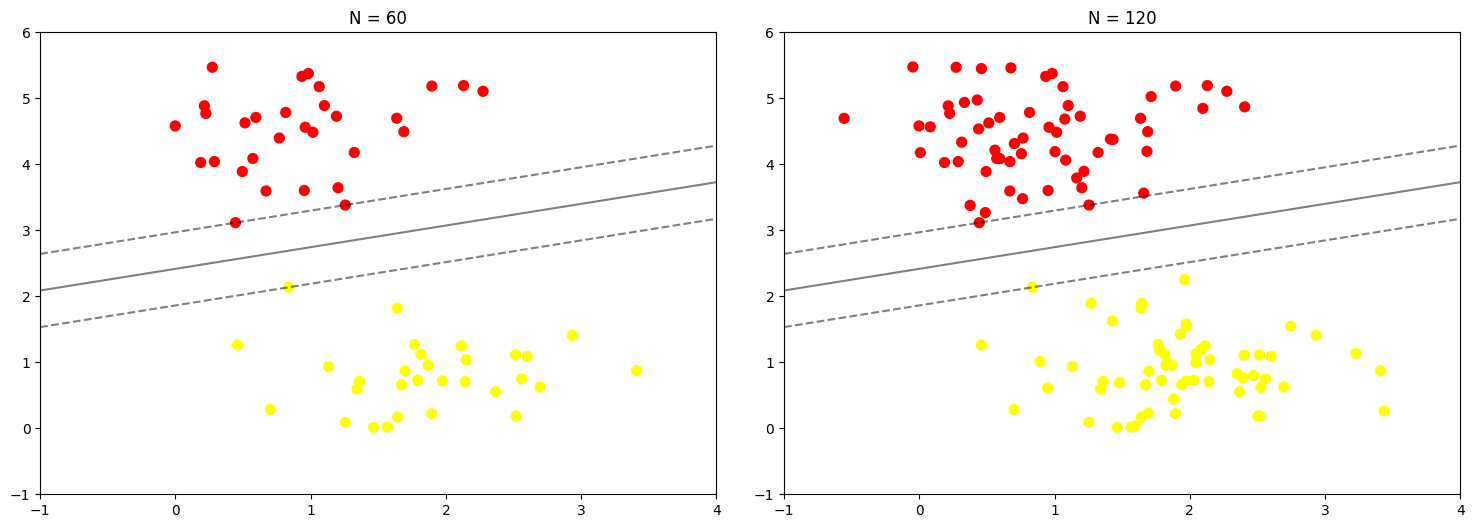

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Kode diatas menghasilkan dua subplot yang menunjukkan hasil fitting model untuk dua ukuran dataset yang berbeda, yaitu 60 dan 120 titik, dengan masing-masing subplot diberi judul sesuai jumlah titik yang digunakan.

### Langkah 10

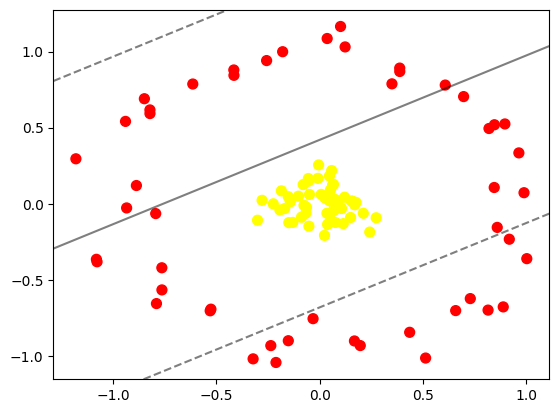

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

**Hasil:** dataset yang membentuk lingkaran dengan 100 sampel yang tidak dapat dipisahkan secara linier, dan memplot titik-titik data serta garis pemisah yang dihasilkan oleh model, meski garis tidak dapat memisahkan kedua kelas

### Langkah 11

In [ ]:
r = np.exp(-(X ** 2).sum(1))

### Langkah 12

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 7.36079452e-02,  2.87522594e-02],
       [ 5.80756227e-02,  2.18078702e-01],
       [ 1.01028441e-01,  1.16458903e+00],
       [ 1.00188487e+00, -3.60566551e-01],
       [-1.07672771e+00, -3.81035608e-01],
       [ 7.50835585e-03,  6.13503131e-02],
       [-9.39071706e-01,  5.41128446e-01],
       [-4.92904303e-02,  6.11949802e-02],
       [ 8.45286011e-01,  5.18998359e-01],
       [ 8.90490910e-02,  1.99183290e-02],
       [-1.42068508e-01,  1.31800199e-02],
       [-9.33645783e-01, -2.73718474e-02],
       [ 6.91643474e-02, -6.76730139e-03],
       [-8.86471547e-01,  1.19800943e-01],
       [ 7.60675665e-02, -1.22959445e-01],
       [-5.19613171e-02, -1.47177461e-01],
       [ 6.57867287e-01, -7.01752210e-01],
       [-5.46450978e-02,  1.65769273e-01],
       [ 3.87444479e-01,  8.68905285e-01],
       [-4.15222719e-01,  8.78928829e-01],
       [ 6.96247055e-01,  7.03990571e-01],
       [ 8.44318925e-01,  1.06843131e-01],
       [-1.69159477e-01, -3.16972853e-02],
       [ 8.14521348e-01, -6.98467658e-01],
       [ 1.20691740e-01,  4.30559595e-02],
       [-1.17907267e+00,  2.95383488e-01],
       [-7.93028893e-01, -6.44780678e-02],
       [ 2.34530963e-02, -2.07827484e-01],
       [ 1.52564497e-01,  1.85873380e-02],
       [ 2.42261123e-01, -1.85904543e-01],
       [-1.51815264e-01,  4.63995994e-02],
       [-6.35467522e-02, -2.35303750e-02],
       [ 1.23094610e-01,  1.03023626e+00],
       [ 1.60285880e-01,  1.61237092e-02],
       [ 1.05875551e-01, -3.11364590e-02],
       [-5.42946430e-02,  1.48348912e-01],
       [ 4.71951902e-02,  1.82703291e-01],
       [ 6.68884868e-02,  1.27643994e-01],
       [ 8.87938330e-01, -6.77478013e-01],
       [-1.02659986e-01,  4.97650201e-02],
       [-5.29529872e-01, -7.03140956e-01],
       [ 3.81337616e-02, -1.35552839e-01],
       [-5.13833201e-03,  2.55094296e-01],
       [-2.24543306e-01, -3.30450419e-04],
       [ 1.49486386e-01, -9.02048603e-02],
       [-2.36272505e-01, -9.31724929e-01],
       [ 9.63546361e-01,  3.34143992e-01],
       [-8.20806928e-01,  5.92447709e-01],
       [-7.63375040e-01, -4.20471533e-01],
       [ 1.96314120e-01, -9.31511146e-01],
       [ 3.62942621e-02,  1.08551090e+00],
       [-1.29563825e-01, -1.22439643e-01],
       [-7.62975592e-01, -5.65809079e-01],
       [-3.19292959e-02, -7.54784972e-01],
       [ 2.11080886e-01, -6.24284092e-02],
       [ 3.49614989e-01,  7.87803124e-01],
       [ 8.18946306e-01,  4.94426982e-01],
       [-2.11314601e-01, -1.04253710e+00],
       [-8.20966857e-01,  6.16585410e-01],
       [-6.68337393e-02, -6.24686071e-02],
       [ 3.54163650e-02, -6.22423160e-02],
       [-5.25954037e-01, -6.92392471e-01],
       [-2.78596795e-01,  2.26133207e-02],
       [-2.56637425e-01,  9.40590650e-01],
       [ 2.61073383e-02,  3.76236711e-02],
       [-7.97078487e-02,  1.26033473e-01],
       [-8.20977022e-03,  1.66848898e-01],
       [-6.13679518e-01,  7.86623430e-01],
       [-1.07984327e+00, -3.64855030e-01],
       [-3.00470991e-01, -1.08163535e-01],
       [ 8.58887821e-01, -1.55223158e-01],
       [-4.14649402e-01,  8.43795987e-01],
       [-1.85171813e-01,  8.48090013e-02],
       [-3.21899847e-01, -1.01874552e+00],
       [ 8.95929355e-01,  5.24264237e-01],
       [-7.89400179e-01, -6.55690174e-01],
       [ 4.52191868e-02,  2.14379138e-02],
       [-1.79045092e-01,  9.98813803e-01],
       [ 6.07436235e-01,  7.79747441e-01],
       [ 5.12469284e-01, -1.01341446e+00],
       [-1.49200668e-01, -1.24064258e-01],
       [ 2.73383588e-01, -9.19857733e-02],
       [ 1.69035548e-01, -7.00838524e-03],
       [ 9.88389944e-01,  7.25994053e-02],
       [-1.51697449e-01, -8.99658538e-01],
       [ 7.28553143e-01, -6.22894711e-01],
       [ 4.35331532e-01, -8.44327151e-01],
       [-7.56947729e-02, -1.01355554e-02],
       [ 1.68256174e-01, -9.01207085e-01],
       [ 1.14128729e-01, -1.30598958e-01],
       [ 5.20688257e-02,  9.07150916e-02],
       [ 5.34473942e-02, -1.05833844e-01

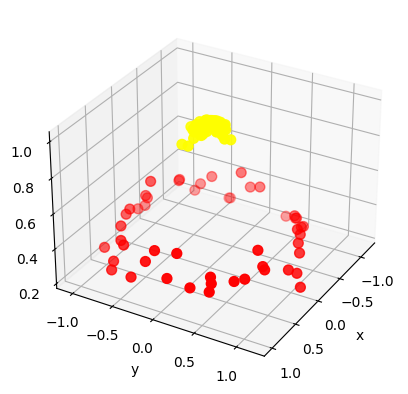

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed # import tambahan untuk mengatasi error


def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

Kode diatas untuk membuat visualisasi tiga dimensi dari dataset yang menggunakan matplotlib, dengan koordinat sumbu z ditentukan oleh nilai r yang merupakan hasil dari fungsi eksponensial negatif dari kuadrat total setiap titik dalam dataset. Fungsi plot_3D memungkinkan pengguna untuk mengubah sudut pandang grafik dengan mengatur elevasi dan azimut, serta memplot titik data dalam tiga dimensi dengan warna berdasarkan label kelasnya. Dengan menggunakan ipywidgets untuk interaksi, pengguna dapat memilih sudut pandang yang berbeda secara dinamis.

### Langkah 13

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

### Langkah 14

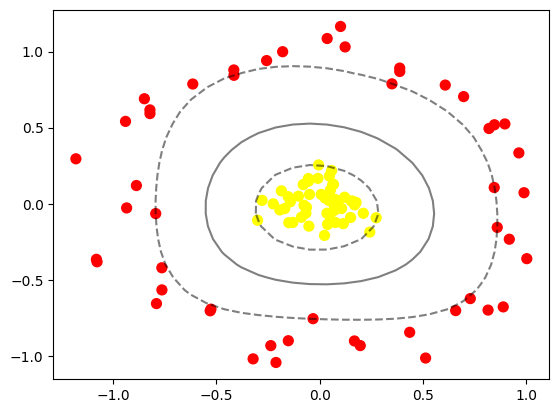

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

**Hasil:** menunjukkan dataset dengan warna yang menunjukan kelas berbeda dan menggambar garis pemisah yang dihasilkan oleh model Support Vector Classifier (SVC), dan menandai support vectors dengan lingkaran besar kosong di sekelilingnya, menunjukkan titik-titik data yang berkontribusi pada posisi garis pemisah.

### Langkah 15 - Data Overlap

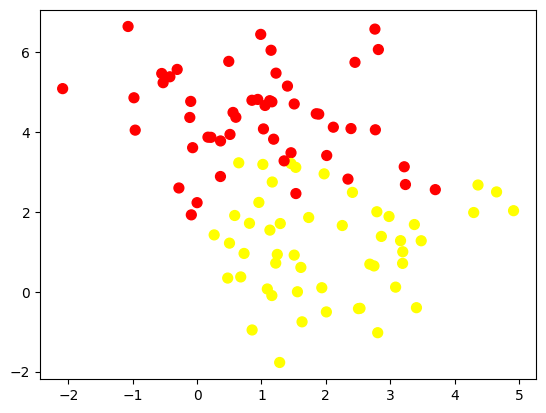

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

**Hasil:** Terdapat 100 sampel yang terbagi menjadi dua kluster menggunakan make_blobs,dan memvisualisasikan ke titik-titik data tersebut dalam grafik scatter, di mana warna setiap titik mencerminkan kelasnya, dan distribusi kluster diatur dengan deviasi standar 1.2 untuk memberikan variasi dalam sebaran data.

### Langkah 16

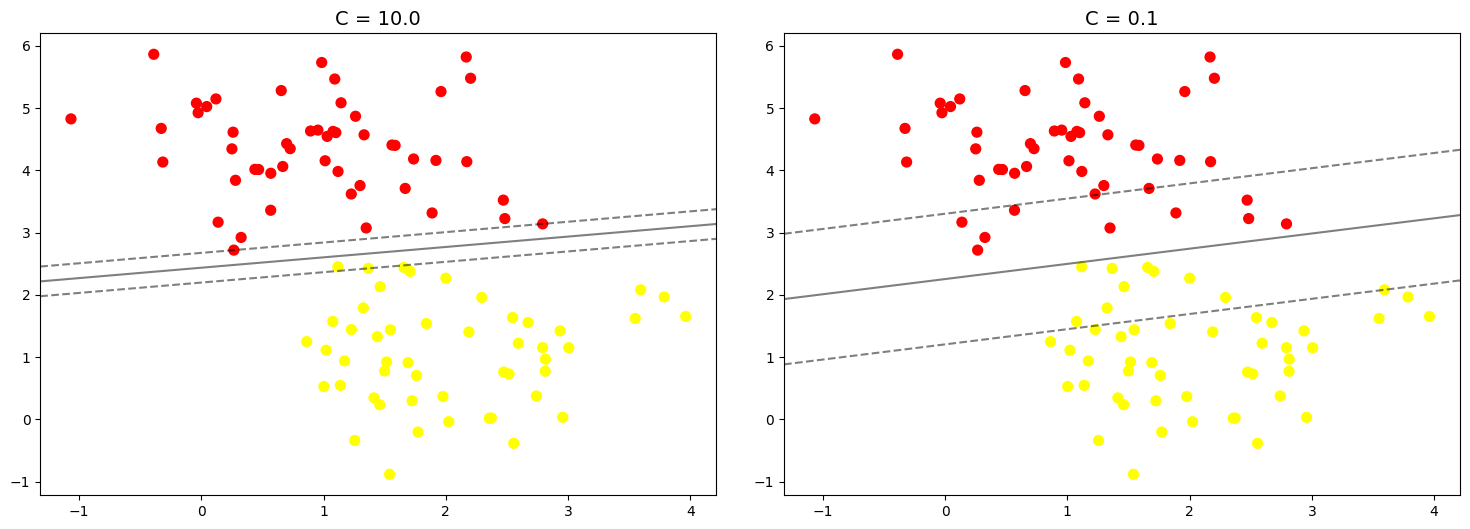

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Praktikum 2

### Langkah 1

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


**Hasil:** memuat dataset wajah dari Labeled Faces in the Wild dengan syarat minimal 60 gambar per orang, kemudian akan dicetak nama-nama individu yang ada dalam dataset, jumlah individu tersebut, serta dimensi gambar-gambar yang tersedia di dalam dataset.

### Langkah 2

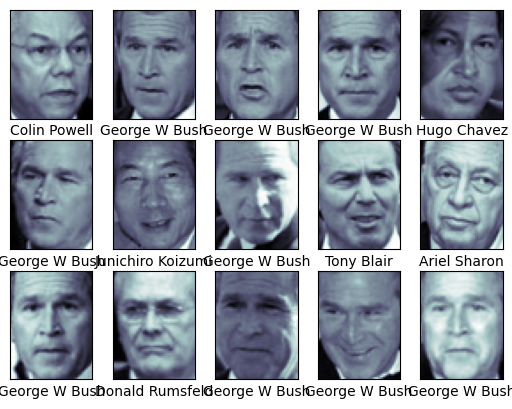

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

**Hasil:** membuat subplot dengan 3 baris dan 5 kolom untuk menampilkan 15 gambar wajah dari dataset Labeled Faces in the Wild, di mana setiap gambar ditampilkan menggunakan colormap 'bone', dan sumbu x dan y dihilangkan dari tampilan. Setiap subplot juga diberi label dengan nama individu yang sesuai dengan gambar tersebut berdasarkan indeks target dari dataset.

### Langkah 3

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

**Hasil:** Untuk mengkonfigurasi model klasifikasi dengan menggunakan Support Vector Classifier (SVC) yang dipasangkan dengan Principal Component Analysis (PCA) dalam sebuah pipeline
*   PCA diatur untuk mengurangi dimensi data menjadi 150 komponen dengan normalisasi

*   SVC menggunakan kernel radial basis function (RBF) dan pengaturan bobot kelas yang seimbang untuk mengatasi ketidakseimbangan kelas dalam data.

### Langkah 4

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

### Langkah 5

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 41s, sys: 27.2 s, total: 2min 8s
Wall time: 1min 18s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022



Kode ini menggunakan GridSearchCV untuk mencari kombinasi terbaik dari parameter
C dan γ pada model SVC, kemudian dicetak dengan parameter dan skor terbaik yang ditemukan, sambil mengukur waktu yang diperlukan untuk fitting model pada data pelatihan.

### Langkah 6

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

### Langkah 7

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

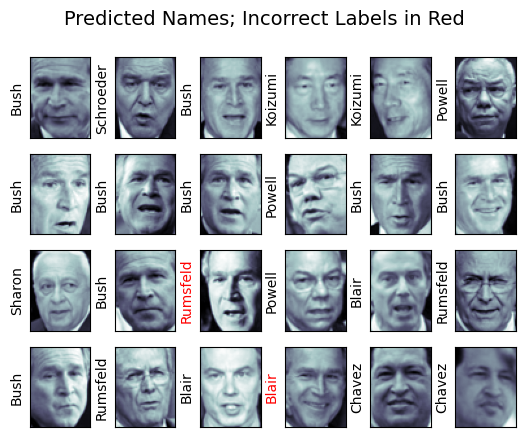

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

**Hasil:** menampilkan 24 gambar wajah dari data pengujian dalam subplot, dengan label nama individu yang diprediksi, diwarnai hitam untuk prediksi yang benar dan merah untuk yang salah, serta menambahkan judul yang menjelaskan bahwa label salah ditandai dengan merah.

### Langkah 8

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

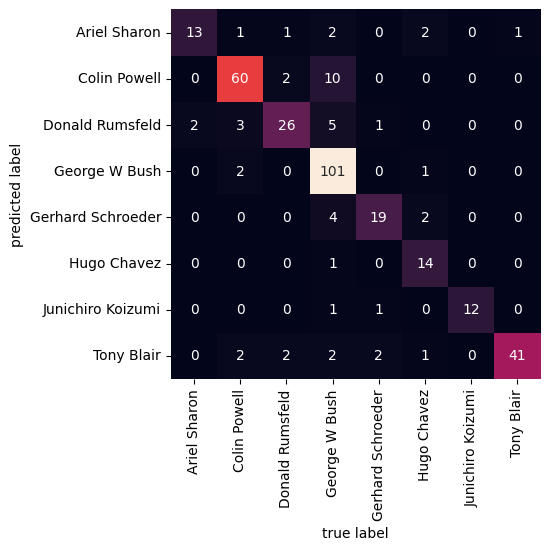

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

**Hasil:** untuk memvisualisasikan confusion matrix menggunakan heatmap untuk membandingkan label asli dan label yang diprediksi, dengan sumbu x menunjukkan label asli dan sumbu y menunjukkan label yang diprediksi, serta menampilkan jumlah prediksi di setiap sel.

## Praktikum 3

### Mendefiniskan Data Dummy

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[139  71]
 [140 167]
 [  9  57]
 [102  67]
 [ 27 132]
 [ 22  36]
 [112  18]
 [ 75  91]
 [134  52]
 [ 18 119]
 [147   3]
 [ 38 212]
 [ 96   8]
 [ 78 167]
 [ 63 200]
 [ 50 216]
 [113 241]
 [ 83  69]
 [ 82 357]
 [ 73  25]
 [ 93 210]
 [ 96 146]
 [126  55]
 [ 87 109]
 [ 39 197]
 [ 82 124]
 [  6 131]
 [115  57]
 [120  31]
 [131  22]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


### (Opsional) Membuat Data Frame

In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,139,71,0
1,140,167,0
2,9,57,0
3,102,67,0
4,27,132,0


In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,139,71,Kelas B
1,140,167,Kelas B
2,9,57,Kelas B
3,102,67,Kelas B
4,27,132,Kelas B


### (Opsional) Visualisasi Data

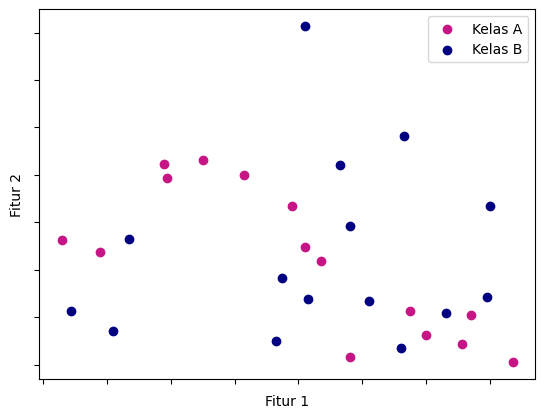

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

### Klasifikasi Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5238095238095238
Hasil akurasi data test: 0.3333333333333333


### Klasifikasi Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6190476190476191
Hasil akurasi data test (Gaussian): 0.2222222222222222


## Praktikum 4

### Langkah 1

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving spam.csv to spam.csv


### Langkah 2 - Load Data

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### langkah 3 - Pra Pengolahan Data

In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Langkah 4 - Ubah Nama Kolom V1 dan V2

In [ ]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Langkah 5 - Inspeksi Data

In [ ]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


### Langkah 6 - Encode Label

In [ ]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Langkah 7 - Ekstraksi Fitur

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'df' is your DataFrame and 'SMS' is the column with text data
X = df['SMS']  # Extract the text data for feature extraction
y = df['Labels']

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
X_test = bow.transform(X_test)

In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


### Langkah 8 - Training dan Evaluasi Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


## Praktikum 5

### Langkah 0 - Import Library

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Image directories
train_dir = '/content/drive/MyDrive/training/'
test_dir = '/content/drive/MyDrive/test'

### Langkah 1 - Load Data dan Visualisasikan

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Kode Program berfungsi untuk load_dataset untuk membaca gambar dari subdirektori dalam direktori yang diberikan, mengaitkan setiap gambar dengan label dari nama subdirektori, dan mengembalikan daftar pasangan gambar dan label.

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 89, 116, 135],
         [ 89, 116, 135],
         [ 89, 116, 135],
         ...,
         [ 83, 100, 116],
         [ 83,  96, 113],
         [124, 137, 154]],
 
        [[ 89, 116, 135],
         [ 89, 116, 135],
         [ 89, 116, 135],
         ...,
         [ 83, 100, 116],
         [ 83,  96, 113],
         [123, 136, 153]],
 
        [[ 89, 116, 135],
         [ 89, 116, 135],
         [ 89, 116, 135],
         ...,
         [ 84, 101, 117],
         [ 83,  96, 113],
         [122, 135, 152]],
 
        ...,
 
        [[163, 145, 107],
         [162, 144, 106],
         [160, 142, 104],
         ...,
         [ 74,  77,  46],
         [ 72,  78,  44],
         [ 67,  73,  39]],
 
        [[172, 154, 116],
         [170, 152, 114],
         [168, 150, 112],
         ...,
         [ 67,  70,  39],
         [ 64,  69,  37],
         [ 60,  66,  32]],
 
        [[199, 181, 143],
         [198, 180, 142],
         [196, 178, 140],
         ...,
         [ 79,  82,  51],
  

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 68
(372, 640, 3)


Untuk memilih indeks acak dari 'train_img' menggunakan np.random.randint, kemudian mencetak nomor gambar yang dipilih dan bentuk (dimensi) gambar tersebut, yang menunjukkan ukuran gambar yang tersimpan dalam daftar.

In [ ]:

# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (737, 1024, 3)
Label	: day


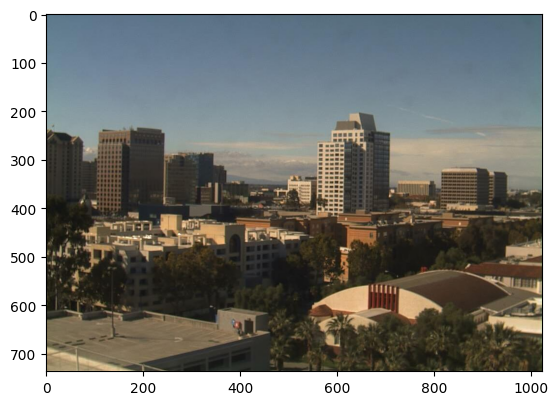

In [ ]:
random_img_viz(train_img)

Fungsi random_img_viz memilih dan menampilkan gambar acak dari daftar img_list, serta mencetak bentuk gambar dan labelnya sebagai 'day' atau 'night' berdasarkan nilai label.

### Langkah 3 - Pra Pengolahan Data

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img


In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val


In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [ ]:
train_std_img_list = preprocess(train_img)

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 62
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 1


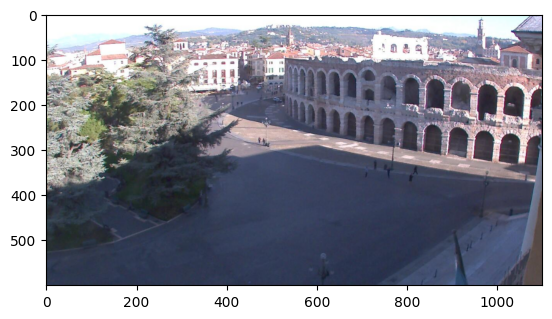

In [ ]:
random_img_viz(train_std_img_list)

**Hasil:** Untuk memproses gambar dengan mengubah ukurannya menjadi 1100x600 piksel dan mengkodekan label menjadi 1 untuk 'day' dan 0 untuk lainnya, lalu menghasilkan daftar gambar yang telah diproses. Selanjutnya, kode memilih gambar acak dari daftar tersebut, mencetak nomor dan bentuk gambar yang dipilih, serta menampilkan gambar tersebut.

### Langkah 4 - Ekstraksi Fitur

In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

'avg_brightness' menghitung kecerahan rata-rata gambar dengan mengonversinya ke ruang warna HSV, menjumlahkan nilai saluran V, dan membaginya dengan jumlah piksel untuk mendapatkan nilai kecerahan rata-rata.

Image 98
Avg Brighness: 167.8920


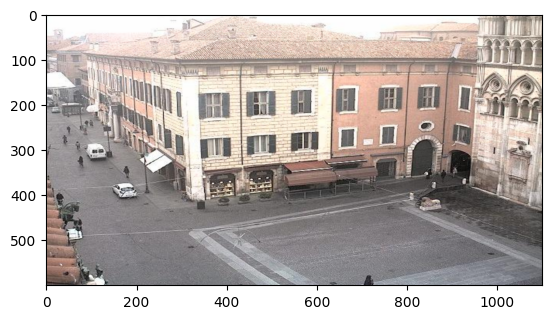

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

Kode diatas untuk memilih gambar acak dari train_std_img_list, dan menghitung kecerahan rata-ratanya, yang akan dicetak sesuai nomor gambar dan nilai kecerahan dan juga menampilkan gambar yang dipilih.

### Langkah 5 - Klasifikasi dengan Metode Threshold

In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

predict_label berfungsi untuk memprediksi label sebuah gambar berdasarkan kecerahan rata-ratanya yang dihitung dengan fungsi avg_brightness. APabila nilai kecerahan rata-rata lebih besar dari ambang batas (threshold) yang ditentukan, maka fungsi mengembalikan prediksi 1; jika tidak, fungsi mengembalikan prediksi 0.

Image 147
Actual label: 0
Predicted label: 0


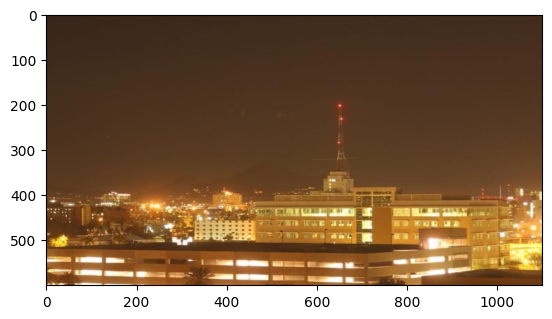

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

**Hasil:** memilih gambar acak dari train_std_img_list, dan memprediksi labelnya menggunakan ambang batas kecerahan 120, dan mencetak nomor gambar, label sebenarnya, serta label yang diprediksi, sambil menampilkan gambar.

### Langkah 6 - Evaluasi (Manual)

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417



*   Fungsi 'evaluate' menghitung akurasi prediksi label untuk daftar gambar dengan membandingkan label yang diprediksi.
*   Fungsi predict_label menyimpan gambar yang salah diklasifikasikan, dan menghitung akurasi berdasarkan jumlah prediksi yang benar dibandingkan dengan total gambar, lalu mencetak akurasi.
*   Kode akan mengevaluasi akurasi model pada data pelatihan dengan ambang batas kecerahan 120.

In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


### Langkah 4 alternatif - Membuat Feature Vectors

In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

**extract_avg_bright_feature** untuk menghitung kecerahan rata-rata dari setiap gambar dalam daftar, dan menyimpan bersama labelnya dalam format tabular menggunakan Pandas DataFrame, dengan kolom 'AVG_BRIGHT' untuk kecerahan dan 'LABELS' untuk label gambar.

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,110.252348,1.0
1,175.092992,1.0
2,103.307636,1.0
3,132.133823,1.0
4,187.700786,1.0


Untuk mengekstrak fitur kecerahan rata-rata dari data pelatihan yang telah diproses,dan disimpan dalam DataFrame train_avg_img, dan mencetak bentuk serta lima baris pertama dari DataFrame.

In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,150.833567,1.0
1,152.010606,1.0
2,158.883767,1.0
3,124.351618,1.0
4,183.717738,1.0


### Langkah 5 alternatif

In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

Kode berfungsi untuk memisahkan fitur dan label dari data pelatihan dan pengujian, kemudian melatih model Support Vector Classifier (SVC) menggunakan data pelatihan.

### Langkah 6 alternatif

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


Untuk membuat prediksi pada data pelatihan dan pengujian menggunakan model yang telah dilatih, kemudian menghitung akurasi untuk masing-masing dataset dengan menggunakan fungsi accuracy_score. Hasil akurasi untuk data pelatihan dan pengujian dicetak untuk memberikan gambaran tentang kinerja model.

# TUGAS PRAKTIKUM


1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  1. Menggunakan data spam.csv
  2. Fitur CountVectorizer dengan mengaktifkan stop_words
  3. Evaluasi hasilnya

3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  1. Menggunakan data spam.csv
  2. Fitur TF-IDF dengan mengaktifkan stop_words
  3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
  4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv


Langkah 0 - Import Library

Langkah 1

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving voice.csv to voice.csv


Soal 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC

data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data['label'].head()

,label
0,1
1,1
2,1
3,1
4,1


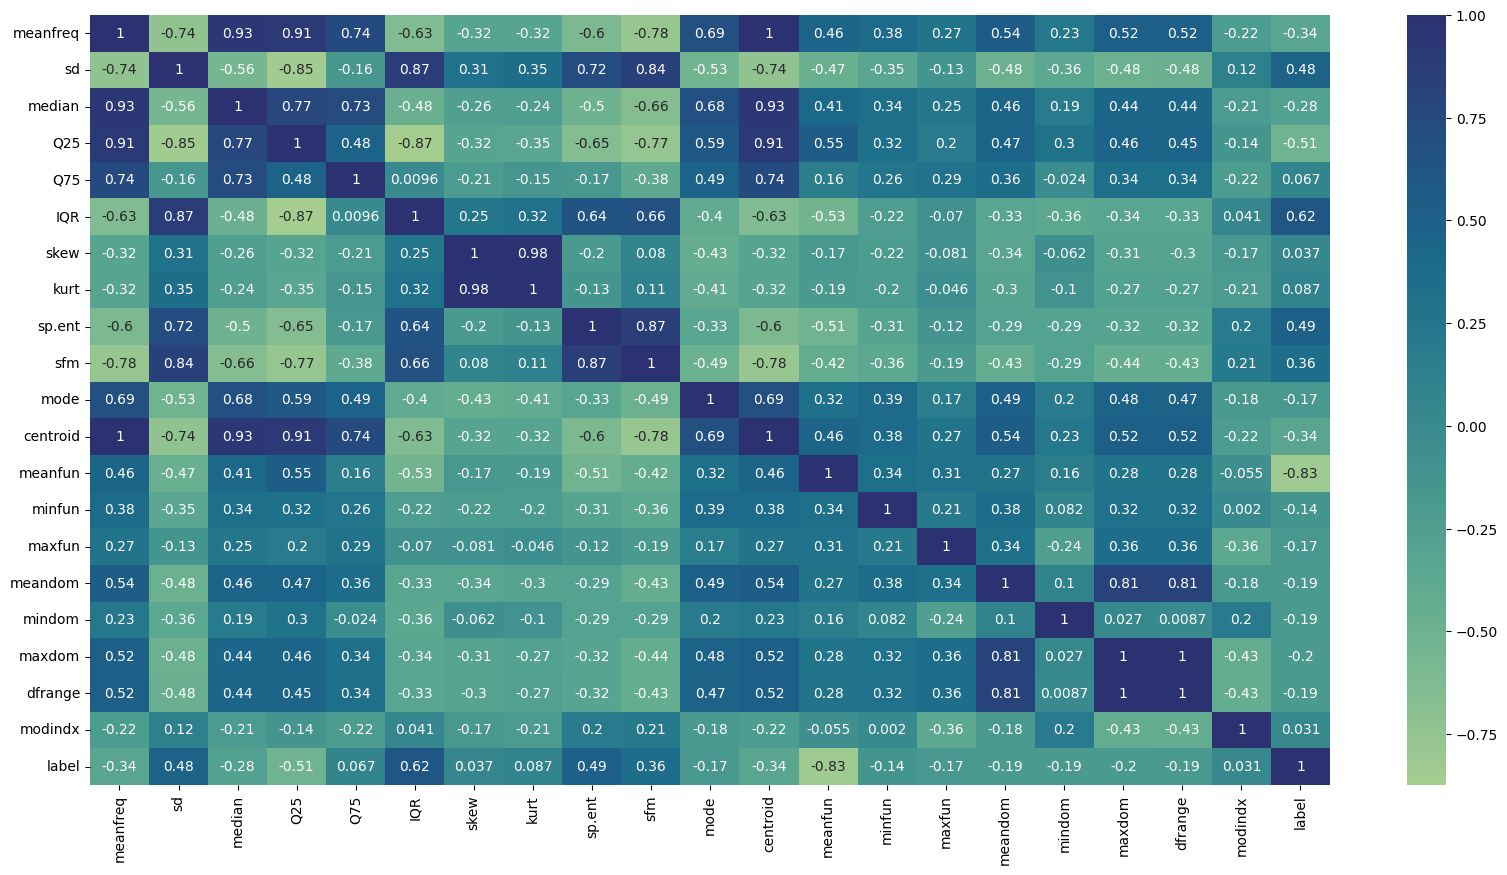

In [ ]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cmap="crest", annot=True)
plt.show()

In [ ]:
X = data.drop(columns='label')
y = data['label']

In [ ]:
std = StandardScaler()

X = std.fit_transform(X)
X

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
model = SVC(kernel='rbf', C=100)
model.fit(X_train, y_train)

SVC(C=100)

In [ ]:
from sklearn.metrics import accuracy_score

# Prediksi dengan data training
y_train_pred = model.predict(X_train)

# Evaluasi akurasi prediksi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi dengan data test
y_test_pred = model.predict(X_test)

# Evaluasi akurasi prediksi test
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train *100:.2f}%')
print(f'Hasil akurasi data test: {acc_test *100:.2f}%')

# Print laporan klasifikasi data test
print(f'Laporan klasifikasi data test\n {classification_report(y_test, y_test_pred)}')

Hasil akurasi data train: 99.96%
Hasil akurasi data test: 98.26%
Laporan klasifikasi data test
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       318
           1       0.98      0.99      0.98       316

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



Soal 2

In [ ]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data.drop(data.iloc[:, 2:],axis=1)

new_cols = {
    'v1' : 'Labels',
    'v2' : 'SMS'
}
data = data.rename(columns=new_cols)

data.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
new_labels = {
    'spam' : 1,
    'ham' : 0
}

data['Labels'] = data['Labels'].map(new_labels)
data.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = data['SMS'].values
y = data['Labels'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bow = CountVectorizer(stop_words='english')

X_train = bow.fit_transform(X_train)
X_test = bow.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_bow = mnb.predict(X_train)

# Hasil akurasi data training
acc_train_bow = accuracy_score(y_train, y_train_pred_bow)

# Prediksi dengan data test
y_test_pred_bow = mnb.predict(X_test)

# Hasil akurasi data test
acc_test_bow = accuracy_score(y_test, y_test_pred_bow)

# Laporan klasifikasi
report_bow = classification_report(y_test, y_test_pred_bow)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train_bow *100:.2f}%')
print(f'Hasil akurasi data test: {acc_test_bow *100:.2f}%')

Hasil akurasi data train: 99.46%
Hasil akurasi data test: 98.39%


Soal 3

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tf_idf = TfidfVectorizer(stop_words='english')

X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_tf_idf = mnb.predict(X_train)

# Hasil akurasi data training
acc_train_tf_idf = accuracy_score(y_train, y_train_pred_tf_idf)

# Prediksi dengan data test
y_test_pred_tf_idf = mnb.predict(X_test)

# Hasil akurasi data test
acc_test_tf_idf = accuracy_score(y_test, y_test_pred_tf_idf)

# Laporan klasifikasi
report_tf_idf = classification_report(y_test, y_test_pred_tf_idf)

# Print perbandingan hasil evaluasi
print(f'Hasil akurasi data train menggunakan TF-IDF: {acc_train_tf_idf*100:.2f}%')
print(f'Hasil akurasi data train menggunakan CrossVectorizer: {acc_train_bow*100:.2f}%')
print(f'Hasil akurasi data test menggunakan TF-IDF: {acc_test_tf_idf*100:.2f}%')
print(f'Hasil akurasi data test menggunakan CrossVectorizer: {acc_test_bow*100:.2f}%')

# Print laporan klasifikasi data test
print('\n')
print(f'Laporan klasifikasi data test menggunakan TF-IDF\n {report_tf_idf}\n')
print(f'Laporan klasifikasi data test menggunakan CrossVectorizer\n {report_bow}')

Hasil akurasi data train menggunakan TF-IDF: 98.38%
Hasil akurasi data train menggunakan CrossVectorizer: 99.46%
Hasil akurasi data test menggunakan TF-IDF: 96.68%
Hasil akurasi data test menggunakan CrossVectorizer: 98.39%


Laporan klasifikasi data test menggunakan TF-IDF
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Laporan klasifikasi data test menggunakan CrossVectorizer
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

